In [4]:
!jt -t chesterish

# Mini-router del sistema de transporte de Medellin

Router es un sistema de inteligencia artificial que usa múltiples estrategias de razonamiento para planear rutas dentro del plantel de Georgia Tech. Combina aspectos de razonamiento basado en casos con razonamiento a través de un modelo/mapa organizado jerárquicamente. 

En este proyecto se implento un mini-router, para encontrar la ruta del sistema de transporte más óptima entre 2 puntos de la Ciudad de Medellin, Colombia. 




## Mapa del sistema de transporte
<img src=https://www.metrodemedellin.gov.co/hubfs/mapas/v1-mapa%20esquematico-2021.jpg width=500/>
    

# Algoritmo de Dijkstra


El algoritmo de Dijkstra sigue estos pasos:

1. Inicializa las distancias, el diccionario de nodos previos y el contador de transferencias.
2. Selecciona el nodo con la menor distancia en el conjunto de nodos no visitados y lo marca como visitado.
3. Si el nodo seleccionado es el nodo de destino, se termina el algoritmo, ya que se ha encontrado la ruta más corta.
4. Si no, se exploran los vecinos del nodo seleccionado y se actualizan las distancias, nodos previos y contador de transferencias según sea necesario.
5. Repite los pasos 2 a 4 hasta que todos los nodos hayan sido visitados o se haya encontrado la ruta más corta al nodo de destino.

Una vez que el algoritmo de Dijkstra haya terminado de ejecutarse, se puede reconstruir la ruta más corta siguiendo los nodos previos desde el nodo de destino hasta el nodo de inicio. El resultado incluye la ruta óptima, la distancia total (tiempo de viaje) y el número de transferencias.

In [2]:
conexiones = {
#Linea H (Villa Serra - Oriente)
('villa serra', 'las torres'): {'weight': 3, 'line': 'H'}, 
('las torres', 'oriente'): {'weight': 2, 'line': 'H'},
#linea J (San Javier - Aurora)
('san javier', 'juan XXIII'): {'weight': 3, 'line': 'J'},
('juan XXIII','vallejuelos'): {'weight': 4, 'line': 'J'},
('vallejuelos','la aurora'): {'weight': 2, 'line': 'J'},
#linea K (Acevedo - Santo Domingo)
('acevedo', 'anadalucia'): {'weight': 2, 'line': 'K'},
('anadalucia', 'popular'): {'weight': 2, 'line': 'K'},
('popular','santo domingo'): {'weight': 4, 'line': 'K'},
#linea L (Santo Domingo - Arvi)
('santo domingo', 'arvi'): {'weight': 14, 'line': 'L'},
#Linea M (Miraflores - 13 de Noviembre)
('miraflores', 'el pinal'): {'weight': 2, 'line': 'M'},
('el pinal', '13 de noviembre'): {'weight': 2, 'line': 'M'},
#linea P (Acevedo - El Progreso)
('acevedo', 'sena'): {'weight': 4, 'line': 'P'},
('sena', '12 de octubre'): {'weight': 4, 'line': 'P'},
('12 de octubre', 'el progreso'): {'weight': 3, 'line': 'P'},
#linea T (Oriente - San Antonio)
('oriente', 'alejandro echeverria'): {'weight': 1, 'line': 'T'},
('alejandro echeverria', 'loyola'): {'weight': 1, 'line': 'T'},
('loyola', 'miraflores'): {'weight': 1, 'line': 'T'},
('miraflores', 'buenos aires'): {'weight': 1, 'line': 'T'},
('buenos aires', 'bicentenario'): {'weight': 2, 'line': 'T'},
('bicentenario', 'pabellon del agua'): {'weight': 1, 'line': 'T'},
('pabellon del agua', 'san jose'): {'weight': 1, 'line': 'T'},
('san jose', 'san antonio'): {'weight': 2, 'line': 'T'},
# Linea 1 (U de M - Parque de Aranjuez)
('u de m', 'los alpes'): {'weight': 1, 'line': '1'},
('los alpes', 'la palma'): {'weight': 1, 'line': '1'},
('la palma', 'parque belen'): {'weight': 2, 'line': '1'},
('parque belen', 'rosales'): {'weight': 2, 'line': '1'},
('rosales', 'fatima'): {'weight': 2, 'line': '1'},
('fatima', 'nutibara'): {'weight': 2, 'line':'1'},
('nutibara', 'industriales'): {'weight': 2, 'line': '1'},
('industriales', 'plaza mayor'): {'weight': 3, 'line': '1'},
('plaza mayor', 'cisneros'): {'weight': 2, 'line': '1'},
('cisneros', 'minorista'): {'weight': 2, 'line': '1'},
('minorista', 'chagualo'): {'weight': 2, 'line': '1'},
('chagualo', 'universidad de antioquia'): {'weight': 2, 'line': '1'},
('universidad de antioquia', 'hospital'): {'weight': 2, 'line': '1'},
('hospital', 'san pedro'): {'weight': 2, 'line': '1'},
('san pedro', 'palos verdes'): {'weight': 2, 'line': '1'},
('palos verdes', 'gardel'): {'weight': 2, 'line': '1'},
('gardel', 'manrique'): {'weight': 2, 'line': '1'},
('manrique', 'esmeraldas'): {'weight': 2, 'line': '1'},
('esmeraldas', 'berlin'): {'weight': 1, 'line': '1'},
('berlin', 'aranjuez'): {'weight': 3, 'line': '1'},
#linea A (niquia-laestrella)
('niqa', 'bello'): {'weight': 2, 'line': 'A'},
('bello','madera'): {'weight': 1, 'line': 'A'},
('madera','acevedo'): {'weight': 2, 'line': 'A'},
('acevedo','tricentenario'): {'weight': 2, 'line': 'A'},
('tricentenario','caribe'): {'weight': 1, 'line': 'A'},
('caribe','universidad'): {'weight': 2, 'line': 'A'},
('universidad','hospital'): {'weight': 1, 'line': 'A'},
('hospital','prado'): {'weight': 1, 'line': 'A'},
('prado','parque berrio'): {'weight': 1, 'line': 'A'},
('parque berrio','san antonio'): {'weight': 1, 'line': 'A'},
('san antonio','alpujarra'): {'weight': 1, 'line': 'A'},
('alpujarra','exposiciones'): {'weight': 1, 'line': 'A'},
('exposiciones','industriales'): {'weight': 1, 'line': 'A'},
('industriales','poblado'): {'weight': 2, 'line': 'A'},
('poblado','aguatacala'): {'weight': 2, 'line': 'A'},
('aguatacala','ayura'): {'weight': 1, 'line': 'A'},
('ayura','envigado'): {'weight': 2, 'line': 'A'},
('envigado','itagui'): {'weight': 2, 'line': 'A'},
('sabaneta','la estrella'): {'weight': 2, 'line': 'A'},
#linea B (san javier - san antonio)
('san javier','santa lucia'): {'weight': 2, 'line': 'B'},
('santa lucia','floresta'): {'weight': 1, 'line': 'B'},
('floresta','estadio'): {'weight': 2, 'line': 'B'},
('estadio','suramericana'): {'weight': 1, 'line': 'B'},
('suramericana','cisneros'): {'weight': 2, 'line': 'B'},
('cisneros','san antonio'): {'weight': 1, 'line': 'B'},

#linea O (caribe- la palma)
('caribe','universal'): {'weight': 3, 'line': 'O'},
('universal','cordoba'): {'weight': 4, 'line': 'O'},
('cordoba','pilarica'): {'weight': 3, 'line': 'O'},
('pila rica','ciudadela universitaria'): {'weight': 2, 'line': 'O'},
('ciudadela universitaria','facultad de las minas'): {'weight': 4, 'line': 'O'},
('facultad de las minas','los colores'): {'weight': 5, 'line': 'O'},
('los colores','calasanz'): {'weight': 3, 'line': 'O'},
('calasanz','floresta'): {'weight': 4, 'line': 'O'},
('floresta','los pinos'): {'weight': 2, 'line': 'O'},
('los pinos','laureles'): {'weight': 3, 'line': 'O'},
('laureles','gema'): {'weight': 3, 'line': 'O'},
('gema','villa de aburra'): {'weight': 5, 'line': 'O'},
('villa de aburra','la palma'): {'weight': 2, 'line': 'O'},

#linea 2 (industriales-palos verdes)
('industriales','barrio colombia'): {'weight': 3, 'line': '2'},
('barrio colombia','perpetuo socorro'): {'weight': 3, 'line': '2'},
('perpetuo socorro','barrio colón'): {'weight': 2, 'line': '2'},
('barrio colon','san jose'): {'weight': 9, 'line': '2'},
('san josé','la playa'): {'weight': 2, 'line': '2'},
('la playa','catedral'): {'weight': 3, 'line': '2'},
('catedral','prado'): {'weight': 4, 'line': '2'},
('prado','palos verdes'): {'weight': 2, 'line': '2'}
}

In [3]:
import time

def vecinos(estacion, conexiones):
    return [c for c in conexiones if estacion in c]

def dijkstra(inicio, destino, conexiones):
    # Inicializar las distancias a cada nodo como infinito, excepto para el nodo de inicio
    dist = {estacion: float("inf") for c in conexiones for estacion in c}
    dist[inicio] = 0

    # Inicializar el diccionario de nodos previos, que almacenará la ruta
    prev = {estacion: None for c in conexiones for estacion in c}

    # Inicializar el contador de transferencias para cada nodo
    transferencias = {estacion: 0 for c in conexiones for estacion in c}

    # Crear un conjunto de nodos no visitados
    no_visitados = {estacion for c in conexiones for estacion in c}

    # Mientras haya nodos no visitados
    while no_visitados:
        # Encuentra el nodo con la menor distancia en el conjunto de nodos no visitados
        actual = min(no_visitados, key=lambda estacion: dist[estacion])

        # Elimina el nodo actual del conjunto de nodos no visitados
        no_visitados.remove(actual)

        # Si hemos llegado al nodo de destino, terminamos el bucle
        if actual == destino:
            break

        # Para cada vecino del nodo actual
        for vecino in vecinos(actual, conexiones):
            otra_estacion = vecino[0] if vecino[1] == actual else vecino[1]
            peso = conexiones[vecino]["weight"]
            line = conexiones[vecino]["line"]

            # Encuentra la línea actual, si hay una
            linea_actual = None
            if prev[actual]:
                for conexion in conexiones:
                    if prev[actual] in conexion and actual in conexion:
                        linea_actual = conexiones[conexion]["line"]
                        break

            # Si la distancia desde el nodo actual al vecino es menor que la distancia almacenada
            if dist[actual] + peso < dist[otra_estacion]:
                # Actualiza la distancia y el nodo previo para el vecino
                dist[otra_estacion] = dist[actual] + peso
                prev[otra_estacion] = actual

                # Actualiza el número de transferencias si cambiamos de línea
                transferencias[otra_estacion] = transferencias[actual] + (0 if linea_actual == line else 1)

    # Reconstruye la ruta desde el nodo de destino hasta el nodo de inicio
    path = []
    estacion = destino
    while estacion != inicio:
        path.append(estacion)
        estacion = prev[estacion]
    path.append(inicio)

    # Devuelve la ruta en orden correcto, el tiempo total de viaje y el número de transferencias
    return path[::-1], dist[destino], transferencias[destino]

In [4]:
inicio = 'sena'
destino = 'miraflores'

start_time = time.time()
ruta, tiempo, transbordos = dijkstra(inicio, destino, conexiones)
end_time = time.time()
execution_time = (end_time - start_time)*1000

print("Ruta:", ruta)
print("Tiempo de viaje:", tiempo, "minutos")
print("Número de transbordos:", transbordos)
print("Tiempo de ejecución del programa:", execution_time, "segundos")

Ruta: ['sena', 'acevedo', 'tricentenario', 'caribe', 'universidad', 'hospital', 'prado', 'parque berrio', 'san antonio', 'san jose', 'pabellon del agua', 'bicentenario', 'buenos aires', 'miraflores']
Tiempo de viaje: 20 minutos
Número de transbordos: 3
Tiempo de ejecución del programa: 1.234292984008789 segundos


# Dijsktra con Razonamiento Basado en Casos 

In [6]:
# Base de casos
base_de_casos = {}

def buscar_caso_similar(inicio, destino, base_de_casos):
    # Comprueba si el caso exacto ya existe en la base de casos
    if (inicio, destino) in base_de_casos:
        return base_de_casos[(inicio, destino)]
    # Si no se encuentra un caso exacto, devuelve None
    return None

def almacenar_caso_resuelto(inicio, destino, ruta, tiempo, transbordos, base_de_casos):
    # Almacena el caso resuelto en la base de casos
    base_de_casos[(inicio, destino)] = (ruta, tiempo, transbordos)

# Modificar la función dijkstra para que utilice razonamiento basado en casos
def dijkstra_con_rbc(inicio, destino, conexiones, base_de_casos):
    # Buscar un caso similar en la base de casos
    caso_similar = buscar_caso_similar(inicio, destino, base_de_casos)

    # Si se encuentra un caso similar, devuelve la solución
    if caso_similar:
        return caso_similar

    # Si no se encuentra un caso similar, calcula la ruta utilizando Dijkstra
    ruta, tiempo, transbordos = dijkstra(inicio, destino, conexiones)

    # Almacenar el caso resuelto en la base de casos
    almacenar_caso_resuelto(inicio, destino, ruta, tiempo, transbordos, base_de_casos)

    # Devuelve la ruta calculada
    return ruta, tiempo, transbordos

start_time = time.time()
# Ejemplo de uso
ruta, tiempo, transbordos = dijkstra_con_rbc(inicio, destino, conexiones, base_de_casos)
end_time = time.time()
execution_time = (end_time - start_time)*1000

print("Ruta:", ruta)
print("Tiempo de viaje:", tiempo, "minutos")
print("Número de transbordos:", transbordos)
print("Tiempo de ejecución del programa:", execution_time, "segundos")

Ruta: ['sena', 'acevedo', 'tricentenario', 'caribe', 'universidad', 'hospital', 'prado', 'parque berrio', 'san antonio', 'san jose', 'pabellon del agua', 'bicentenario', 'buenos aires', 'miraflores']
Tiempo de viaje: 20 minutos
Número de transbordos: 3
Tiempo de ejecución del programa: 1.2907981872558594 segundos


# Graficacion con NetworkX y Matplotlib

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [57]:
import heapq

In [6]:
#!pip install networkx matplotlib

In [3]:
G = nx.DiGraph()

for edge, attributes in conexiones.items():
    G.add_edge(edge[0], edge[1], **attributes)

In [17]:
def astar_path_with_time(graph, start, end):
    path = nx.astar_path(graph, start, end, heuristic)
    travel_time = sum(graph[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1))
    return path, travel_time

ruta, tiempo = astar_path_with_time(G, 'loyola', 'el progreso')
print("Ruta:", ruta)
print("Tiempo de viaje:", tiempo, "minutos")

Ruta: ['loyola', 'miraflores', 'buenos aires', 'bicentenario', 'pabellon del agua', 'san jose', 'san antonio', 'parque berrio', 'prado', 'hospital', 'universidad', 'caribe', 'tricentenario', 'acevedo', 'sena', '12 de octubre', 'el progreso']
Tiempo de viaje: 28 minutos


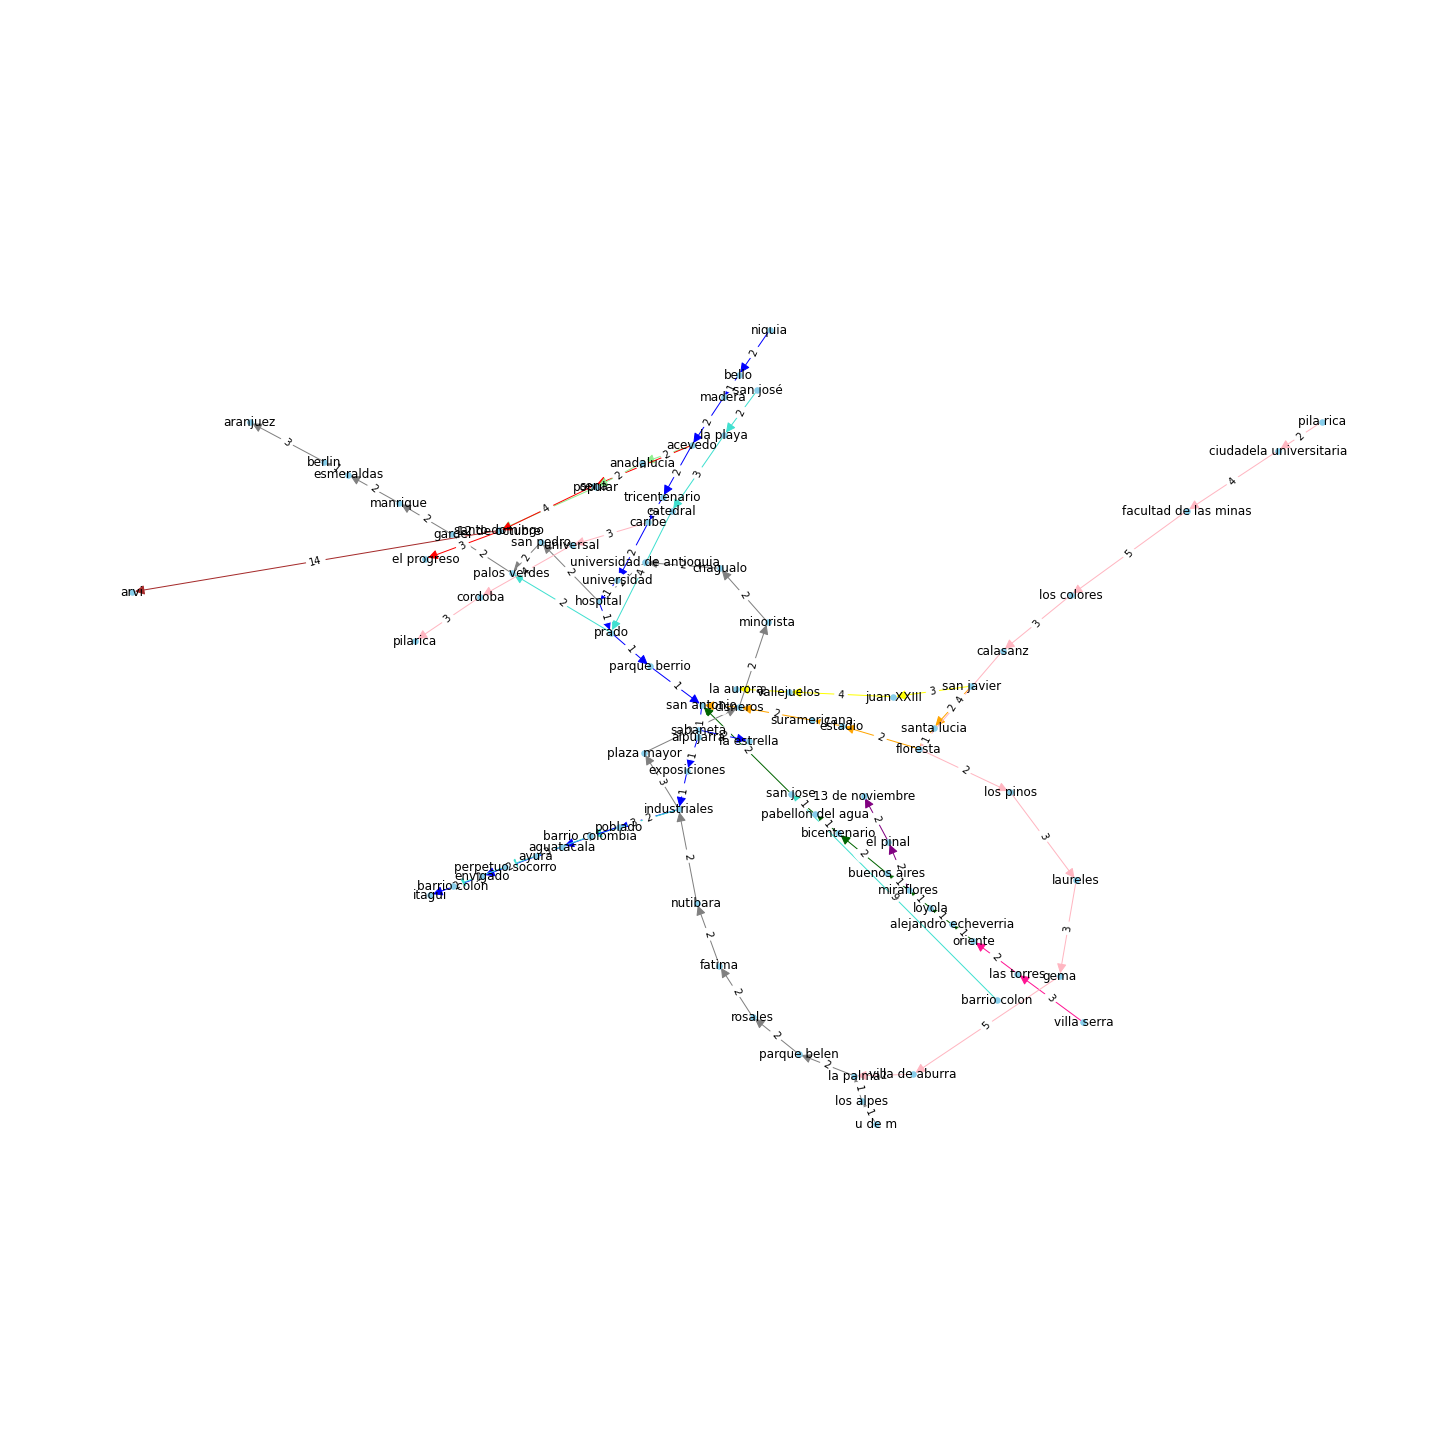

In [40]:
pos = nx.kamada_kawai_layout(G)

# Aumenta el tamaño de la figura
plt.figure(figsize=(20, 20))

# Dibuja los nodos, etiquetas y bordes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=30, font_size=12, edge_color=edge_colors, arrows=True, arrowsize=20)

# Dibuja las etiquetas de peso en los bordes
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)

# Asegura que las escalas de los ejes sean iguales
plt.axis('equal')

# Muestra la gráfica
plt.show()

In [33]:
colores_lineas = {
    'H': 'deeppink',
    'J': 'yellow',
    'K': 'lightgreen',
    'L': 'brown',
    'M': 'purple',
    'P': 'red',
    'T': 'darkgreen',
    '1': 'gray',
    'A': 'blue',
    'B': 'orange',
    'O': 'lightpink',
    '2': 'turquoise',
}

edge_colors = [colores_lineas[G[u][v]['line']] for u, v in G.edges()]